# Les DataFrames avec PANDAS

## 1. le dataset
Le naufrage du Titanic est l'un des naufrages les plus tristement célèbres de l'histoire.

Le 15 avril 1912, lors de son voyage inaugural, le RMS Titanic largement considéré comme "insubmersible" a coulé après être entré en collision avec un iceberg.  
Malheureusement, il n'y avait pas assez de canots de sauvetage pour tout le monde à bord, ce qui a entraîné la mort de 1502 des 2224 passagers et membres d'équipage.

Bien qu'il y ait eu un élément de chance dans la survie, il semble que certains groupes de personnes étaient plus susceptibles de survivre que d'autres.  

Nous utiliserons le dataset titanic.csv dans ce tutoriel. Source https://www.kaggle.com/c/titanic/data   

**dictionnaire du dataset:**

| Variable | Définition| Key |
|---|---|---|
survival | Survie	| 0 = Non, 1 = Oui
pclass |	Classe de billet |	1 = 1er, 2 = 2ème, 3 = 3ème
sex |	Sexe	
Age |	Age en années	
sibsp |	# de frères et sœurs / conjoints à bord du Titanic	
parch |	# de parents/enfants à bord du Titanic	
ticket |	Numéro de billet	
fare |	Tarif passager	
cabin| 	Numéro de cabine	
embarked|	Port d'Embarquation|	C = Cherbourg, Q = Queenstown, S = Southampton


* pclass : statut socio-économique (SSE)
    * 1er = supérieur
    * 2ème = moyen
    * 3ème = inférieur    
      
* parch : L'ensemble de données définit les relations familiales de cette manière...
    * Parent = mère, père
    * Enfant = fille, fils, belle-fille, beau-fils
    * Certains enfants voyageaient uniquement avec une nounou, donc parch=0 pour eux.

* Age : 
    * l'âge est fractionnaire s'il est inférieur à 1. 
    * Si l'âge est estimé, il est sous la forme xx.5








## 2. Opérations de bases: 
* chargement d'un fichier csv
* exploration: taille, colonnes, statistiques globales

In [ ]:
# charger  la librairie pandas
import pandas as pd # nous chargeons la librairie pandas et nous lui donnons  un alias

In [2]:
# charger le dataset 
titanic =  pd.read_csv('titanic.csv')

In [3]:
# taille du dataset: nombre de lignes et de colonnes
titanic.shape 

(891, 12)

In [4]:
# la liste des colonnes
titanic.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# type de chaque colonne
titanic.dtypes 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# afficher les n premieres lignes:
titanic.head(3) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [9]:
# afficher un sample de taille n ici n = 4:
titanic.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,NaN,Q
723,724,0,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.0000,NaN,S
507,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C


In [11]:
#informations sur les données
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
#description des données numeriques
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
#description des données categorielles
titanic.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## 3 Manipulation des colonnes    


In [24]:
#accès à une colonne
titanic['Age'] # autre methode: titanic.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [26]:
#accéder à un ensemble de colonnes
cols = ['Name', 'Sex', 'Age']
titanic[cols]

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0
...,...,...,...
886,"Montvila, Rev. Juozas",male,27.0
887,"Graham, Miss. Margaret Edith",female,19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
889,"Behr, Mr. Karl Howell",male,26.0


In [127]:
# Nous pouvons appliquer des opérations à une colonne de DataFrame
print(titanic['Age'].mean())
print(titanic['Age'].std())
print(titanic['Age'].max())
print(titanic['Age'].median())
print(titanic['Age'].quantile()) 
print(titanic['Age'].quantile(q= 0.75))

29.69911764705882
14.526497332334044
80.0
28.0
28.0
38.0


In [75]:
# trier les valeurs d'une colonne  de manière croissante
titanic['Age'].sort_values() # titanic['Age'].sort_values(ascending = False) permet de trier de manière décroisssante

803    0.42
755    0.67
644    0.75
469    0.75
78     0.83
       ... 
859     NaN
863     NaN
868     NaN
878     NaN
888     NaN
Name: Age, Length: 891, dtype: float64

<AxesSubplot:>

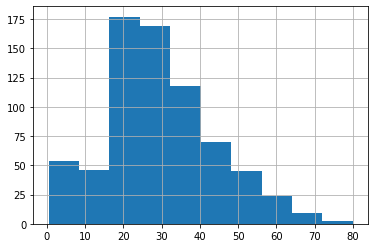

In [28]:
# nous affichons la distribution de la colonne Age:
titanic['Age'].hist()

In [33]:
# occurences de la colonnes sex
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [36]:
# occurences de la colonnes Servival
titanic['Survived'].value_counts(normalize=True) # 38 % des voyageurs ont survécu 

0    0.616162
1    0.383838
Name: Survived, dtype: float64

## 4 accès aux données d'un DataFrame

In [37]:
# accès à la 6 eme valeur de la colonne Name (ne pas oublier que les indices en python démarrent à 0)
titanic['Name'][5] 

'Moran, Mr. James'

In [57]:
# accès aux lignes situées entre 2 et 5 exclu
titanic[2: 5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


In [61]:
# accès à l'aide de la fonction iloc
titanic.iloc[2: 5, 3: 6] # accès aux lignes situées entre  2 et 5 exclu et aux colonnes situées entre 3 et 6 exclu

,Name,Sex,Age
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0


In [64]:
# accès à l'aide de la fonction loc
titanic.loc[45: 48, 'Name'] # les valeurs de la colonnes 'Name' ayant des labels entre 45 et 48 inclu

45     Rogers, Mr. William John
46            Lennon, Mr. Denis
47    O'Driscoll, Miss. Bridget
48          Samaan, Mr. Youssef
Name: Name, dtype: object

**/!\ iloc vs loc** 
Attention à la confusion entre loc et iloc:  
* iloc prend les positions des valeurs en partant par 0 pour une ligne et une colonne
* loc prend les labels des lignes et des colonnes    

Pour mieux comprendre la différence,  on considère une extraction du dataset titanic que l'on nomme titanic_sample

In [66]:
titanic_sample = titanic.sample(5)
titanic_sample

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5000,T,S
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S
769,770,0,3,"Gronnestad, Mr. Daniel Danielsen",male,32.0,0,0,8471,8.3625,NaN,S
537,538,1,1,"LeRoy, Miss. Bertha",female,30.0,0,0,PC 17761,106.4250,NaN,C


In [68]:
titanic_sample.iloc[1, 3] # affiche la valeur de la 2 eme ligne et de la 4 eme colonne

'Allen, Miss. Elisabeth Walton'

In [70]:
titanic_sample.loc[730, 'Name'] # affiche la valeur dont le label de la ligne est 730 et celui de la colonne est 'Name'

'Allen, Miss. Elisabeth Walton'

## 5. filtrage de données avec conditions

In [78]:
# afficher les lignes correspondant au sexe feminin
filtre_sex = titanic['Sex'] == 'female'
titanic.loc[filtre_sex] # titanic[filtre_sex] est possible aussi

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [86]:
# Question: calculer l'age moyen des voyageurs de sexe feminin

In [ ]:
# Question: afficher les données correspondant aux individus survécus

**Les voyageurs les plus riches avaient plus de chance de survivre ?**

In [112]:
titanic[ titanic.Pclass == 1  ]['Survived'].value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [113]:
titanic[ titanic.Pclass == 3  ]['Survived'].value_counts()

0    372
1    119
Name: Survived, dtype: int64

In [ ]:
# Question: répondez à la question précédente en utilisant le prix des billets

In [ ]:
# Question: Tous les bèbès de moins de 1 an ont survécu. Vérifiez cette information ! 

#### Now, nous filtrons avec plusieurs conditions
nous voulons afficher les données des voyageurs:
   * de la première classe 
   * ayant un prix de billet superieur à 400
   * de sexe feminin 

In [151]:
filter_class = titanic.Pclass == 1 
filter_fare = titanic.Fare >= 400
filter_sex = titanic.Sex == 'female'

filter_all = filter_class & filter_fare & filter_sex
titanic[filter_all]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C


Question: 
Affichez les données de voyageurs:
 * ayant un age inferieur à 1  ou superieur à 70
 * n'ayant pas embarqués de Cherbourg

In [ ]:
# to do
1. crosstab
2. correlation
3. tirage aleatoire
4. lois de proba
5. numpy
pttr faire ça dans un new notebook

**REF**
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
* https://www.kaggle.com/c/titanic/leaderboard
* https://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_Data_Manipulation_Pandas.pdf